# Task 1

Lloyd's algorithm K-means

In [14]:
import numpy as np

np.random.seed(0)

data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

M = np.mean(data_x, axis=0)      # вычисление средних по каждой координате
D = np.var(data_x, axis=0)       # вычисление дисперсий по каждой координате
K = 3                       # число кластеров
ma = [np.random.normal(M, np.sqrt(D / 10), 2) for n in range(K)]        # начальные центры кластеров (3 with 2 coordinates)
ro = lambda x1, x2: np.mean([np.abs(x1[i] - x2[i]) for i in range(len(x1))])
start, end = 0, 52
X = [[] for _ in range(K)]

while start < end:   
    X = [[] for _ in range(K)]
    for i in range(len(data_x)):
        ind = np.argmin([ro(data_x[i], ma[j]) for j in range(len(ma))])
        X[ind].append(data_x[i])
    
    for j in range(len(ma)):
        ma[j] = np.mean(X[j], axis=0) # center updating
    
    start += 1

[[(344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89)], [(48, 118), (74, 96), (103, 82), (135, 76), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (134, 96)], [(162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66)]]


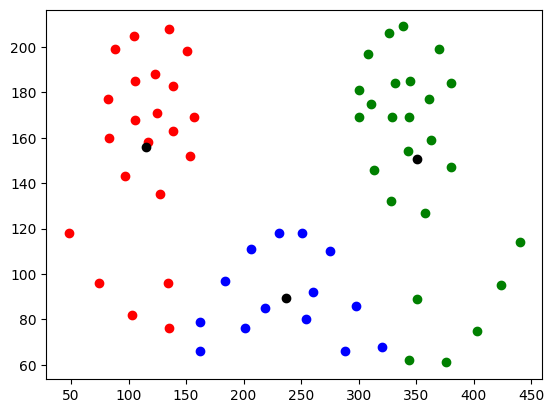

In [15]:
import matplotlib.pyplot as plt

print(X)
clrs = ['g', 'r', 'b']
for i in range(len(X)):
    for j in range(len(X[i])):
        plt.scatter(X[i][j][0], X[i][j][1], c=clrs[i])
    plt.scatter(ma[i][0], ma[i][1], c='k')

# Task 2

calculating of the claster center, using a portion of marked up and unmarked selections

In [24]:
import numpy as np

T = [[(365, 200), (390, 180), (350, 172), (400, 171)], [(77, 150), (100, 200), (50, 130)], [(250, 100), (170, 88), (280, 102), (230, 108)]]
data_x = [(48, 118), (74, 96), (103, 82), (135, 76), (162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (134, 96)]

K = 3 # число кластеров

ro = lambda x1, x2: np.mean([(x1[i] - x2[i]) ** 2 for i in range(len(x1))])
ma = [np.mean(T[i], axis=0) for i in range(K)]
start, end = 0, 52
# X = [[] for _ in range(K)]

while start < end:
    X = [[] for _ in range(K)]

    for i in range(len(data_x)):
        '''
        eanch data_x[i] append into X with index of minimal distance between data_x[i] and one of 3 different coordinates of cluster centers
        '''
        X[np.argmin([ro(ma[j], data_x[i]) for j in range(K)])].append(data_x[i])
    
    for i in range(len(ma)):
        full_claster = T[i] + X[i]
        ma[i] = np.mean(full_claster, axis=0)
    
    start += 1

X = [X[i] + T[i] for i in range(K)]

[[(344, 62), (376, 61), (403, 75), (424, 95), (440, 114), (358, 127), (328, 132), (313, 146), (300, 169), (300, 181), (308, 197), (326, 206), (339, 209), (370, 199), (380, 184), (380, 147), (343, 154), (329, 169), (332, 184), (345, 185), (363, 159), (361, 177), (344, 169), (311, 175), (351, 89), (365, 200), (390, 180), (350, 172), (400, 171)], [(48, 118), (74, 96), (103, 82), (135, 76), (127, 135), (97, 143), (83, 160), (82, 177), (88, 199), (105, 205), (135, 208), (151, 198), (157, 169), (153, 152), (117, 158), (106, 168), (106, 185), (123, 188), (125, 171), (139, 163), (139, 183), (134, 96), (77, 150), (100, 200), (50, 130)], [(162, 79), (184, 97), (206, 111), (231, 118), (251, 118), (275, 110), (298, 86), (320, 68), (254, 80), (219, 85), (288, 66), (260, 92), (201, 76), (162, 66), (250, 100), (170, 88), (280, 102), (230, 108)]]


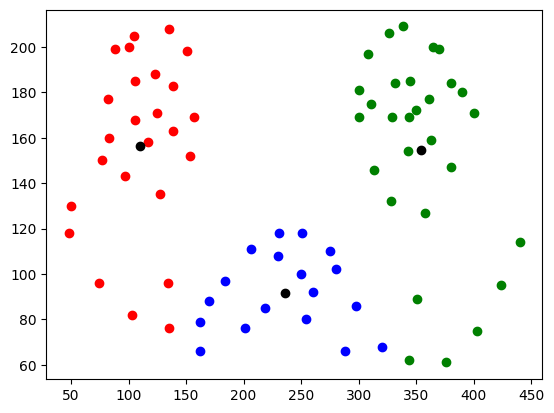

In [25]:
import matplotlib.pyplot as plt

print(X)
clrs = ['g', 'r', 'b']
for i in range(len(X)):
    for j in range(len(X[i])):
        plt.scatter(X[i][j][0], X[i][j][1], c=clrs[i])
    plt.scatter(ma[i][0], ma[i][1], c='k')